In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [167]:
df_news = pd.read_parquet('cryptonews/data/5.cryptonews_grouped_by_day.parquet')
df_news.head()

,date,news_count,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
0,2021-01-01 00:00:00+00:00,34,0.744828,0.450000,-0.700000,0.5,0.645455,-0.3
1,2021-01-02 00:00:00+00:00,43,0.827500,0.500000,-0.300000,0.1,0.500000,NaN
2,2021-01-03 00:00:00+00:00,39,0.824242,-0.100000,0.300000,0.4,0.616667,NaN
3,2021-01-04 00:00:00+00:00,66,0.077049,0.200000,-0.233333,0.6,0.476471,NaN
4,2021-01-05 00:00:00+00:00,65,0.580000,0.571429,0.525000,0.5,0.650000,NaN


In [168]:
cols = ['tanalysis_absa', 'economy_absa', 'regulation_absa', 'technology_absa', 'adoption_absa', 'cybersecurity_absa']
df_news['signal'] = df_news[cols].mean(axis=1)
df_news.drop(columns=cols, inplace=True)

df_news.head()

,date,news_count,signal
0,2021-01-01 00:00:00+00:00,34,0.223380
1,2021-01-02 00:00:00+00:00,43,0.325500
2,2021-01-03 00:00:00+00:00,39,0.408182
3,2021-01-04 00:00:00+00:00,66,0.224037
4,2021-01-05 00:00:00+00:00,65,0.565286


In [169]:
df_btc_return = pd.read_parquet('price/btc_return_daily.parquet')
df_btc_return.head()

,Date,daily_return
0,2021-01-01,NaN
1,2021-01-02,0.013190
2,2021-01-03,0.093713
3,2021-01-04,0.021212
4,2021-01-05,-0.025416


In [170]:
df_btc_return['daily_return'] = df_btc_return['daily_return'].shift(-1)
df_btc_return

,Date,daily_return
0,2021-01-01,0.013190
1,2021-01-02,0.093713
2,2021-01-03,0.021212
3,2021-01-04,-0.025416
4,2021-01-05,0.063689
...,...,...
1456,2024-12-27,-0.016141
1457,2024-12-28,0.010767
1458,2024-12-29,-0.017304
1459,2024-12-30,-0.009451


In [171]:
df = pd.concat([df_news, df_btc_return], axis = 1)
df.drop(columns = ['Date'], inplace = True)
df.head()

,date,news_count,signal,daily_return
0,2021-01-01 00:00:00+00:00,34,0.223380,0.013190
1,2021-01-02 00:00:00+00:00,43,0.325500,0.093713
2,2021-01-03 00:00:00+00:00,39,0.408182,0.021212
3,2021-01-04 00:00:00+00:00,66,0.224037,-0.025416
4,2021-01-05 00:00:00+00:00,65,0.565286,0.063689


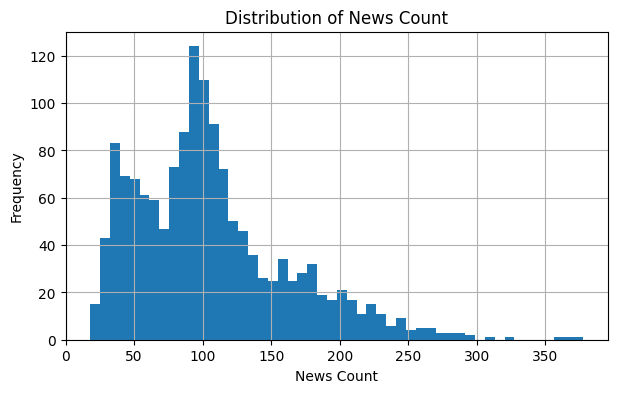

In [172]:
df['news_count'].hist(bins=50, figsize=(7, 4))
plt.title('Distribution of News Count')
plt.xlabel('News Count')
plt.ylabel('Frequency')
plt.show()

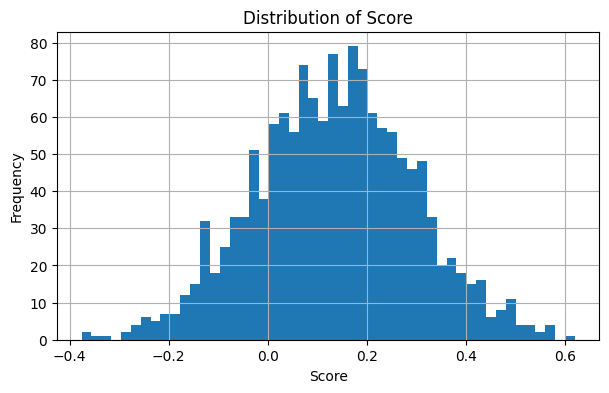

In [173]:
df['signal'].hist(bins=50, figsize=(7, 4))
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### alpha generation

In [174]:
df.head()

,date,news_count,signal,daily_return
0,2021-01-01 00:00:00+00:00,34,0.223380,0.013190
1,2021-01-02 00:00:00+00:00,43,0.325500,0.093713
2,2021-01-03 00:00:00+00:00,39,0.408182,0.021212
3,2021-01-04 00:00:00+00:00,66,0.224037,-0.025416
4,2021-01-05 00:00:00+00:00,65,0.565286,0.063689


In [175]:
# Signal smoothing

df['signal'] = df['signal'].ewm(span=5).mean() # expoenential weighted moving average
# df['signal'] = df['signal'].rolling(window=3).mean() # simple moving average

In [176]:
df.head()

,date,news_count,signal,daily_return
0,2021-01-01 00:00:00+00:00,34,0.223380,0.013190
1,2021-01-02 00:00:00+00:00,43,0.284652,0.093713
2,2021-01-03 00:00:00+00:00,39,0.343166,0.021212
3,2021-01-04 00:00:00+00:00,66,0.293682,-0.025416
4,2021-01-05 00:00:00+00:00,65,0.397947,0.063689


In [177]:
# rolling

# df['signal'] = df['signal'].rolling(window=3).mean()

In [178]:
def run_backtest(signal, daily_return):
  pass

Overall Annual Return: 0.26526046296013683
Overall Annual Sharpe Ratio: 2.5102885360111755

Yearly Metrics:
   year  yearly_return  yearly_sharpe
0  2021       0.599176       4.255937
1  2022       0.021330       0.315604
2  2023       0.194771       2.359948
3  2024       0.245764       2.149586
Average Yearly Return: 0.2652604629601369


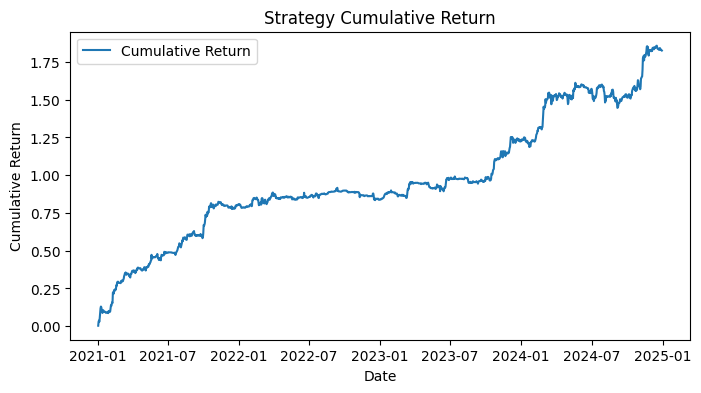

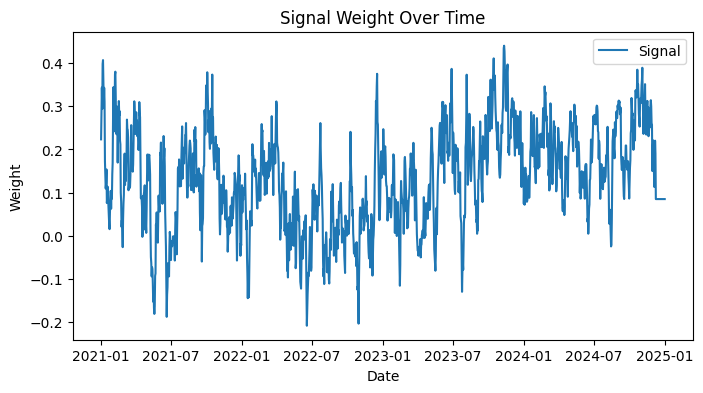

In [179]:
# Calculate daily strategy returns
df['strategy_return'] = df['signal'] * df['daily_return']

# Overall Annual Return and Sharpe Ratio
daily_mean = df['strategy_return'].mean()
daily_std = df['strategy_return'].std()
annual_return = daily_mean * 365
annual_volatility = daily_std * np.sqrt(365)
overall_sharpe = annual_return / annual_volatility

print("Overall Annual Return:", annual_return)
print("Overall Annual Sharpe Ratio:", overall_sharpe)

# Yearly metrics
df['year'] = df['date'].dt.year
yearly_data = df.groupby('year')['strategy_return'].agg(['mean','std']).reset_index()
yearly_data['yearly_return'] = yearly_data['mean'] * 365
yearly_data['yearly_vol'] = yearly_data['std'] * np.sqrt(365)
yearly_data['yearly_sharpe'] = yearly_data['yearly_return'] / yearly_data['yearly_vol']
average_yearly_return = yearly_data['yearly_return'].mean()

print("\nYearly Metrics:")
print(yearly_data[['year','yearly_return','yearly_sharpe']])
print("Average Yearly Return:", average_yearly_return)

# Cumulative return plot
df['cum_return'] = (1 + df['strategy_return']).cumprod() - 1
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['cum_return'], label='Cumulative Return')
plt.title('Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Signal weight plot
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['signal'], label='Signal')
plt.title('Signal Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
plt.show()

Overall Annual Return (Geometric): 0.29622236101592025
Overall Annual Sharpe Ratio: 2.8032960082716007

Yearly Metrics (Geometric):
   year  yearly_return  yearly_sharpe
0  2021       0.802086       5.697197
1  2022       0.019238       0.284654
2  2023       0.210867       2.554973
3  2024       0.269391       2.356236


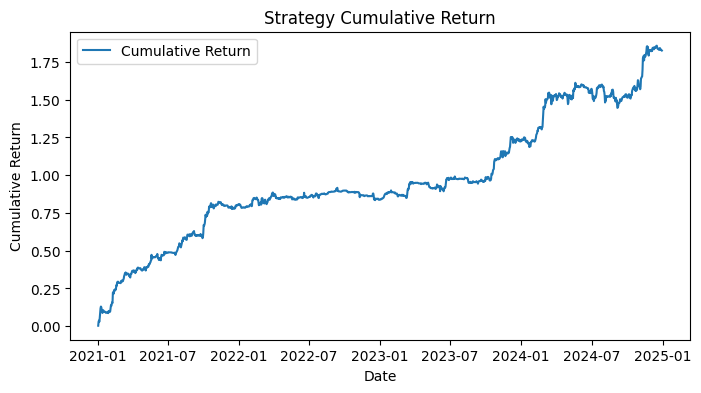

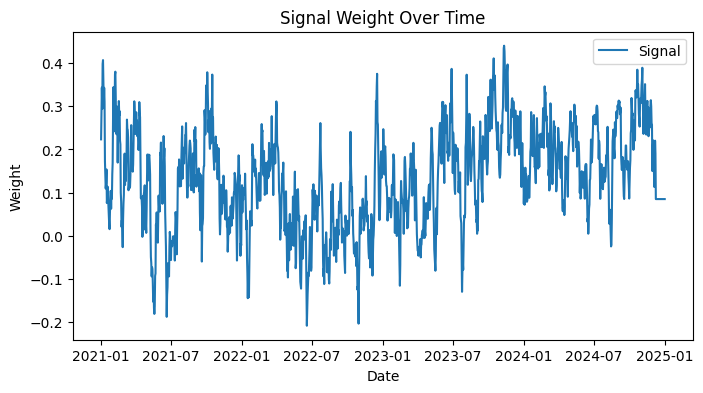

In [180]:
# Calculate daily strategy returns
df['strategy_return'] = df['signal'] * df['daily_return']

# Overall Geometric Annual Return and Sharpe Ratio
num_days = len(df)
geometric_daily_return = (1 + df['strategy_return']).prod()**(1/num_days) - 1
annual_return = (1 + geometric_daily_return)**365 - 1

daily_std = df['strategy_return'].std()
annual_volatility = daily_std * np.sqrt(365)
overall_sharpe = annual_return / annual_volatility

print("Overall Annual Return (Geometric):", annual_return)
print("Overall Annual Sharpe Ratio:", overall_sharpe)

# Yearly metrics (geometric)
df['year'] = df['date'].dt.year

def annualize_geo_return(x):
    # geometric daily return for that subset
    gdr = (1 + x).prod()**(1/len(x)) - 1
    return (1 + gdr)**365 - 1

def annualize_volatility(x):
    return x.std() * np.sqrt(365)

yearly_data = df.groupby('year')['strategy_return'].agg(
    yearly_return=lambda x: annualize_geo_return(x),
    yearly_vol=lambda x: annualize_volatility(x)
).reset_index()

yearly_data['yearly_sharpe'] = yearly_data['yearly_return'] / yearly_data['yearly_vol']
print("\nYearly Metrics (Geometric):")
print(yearly_data[['year','yearly_return','yearly_sharpe']])

# Cumulative return plot
df['cum_return'] = (1 + df['strategy_return']).cumprod() - 1
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['cum_return'], label='Cumulative Return')
plt.title('Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Signal weight plot
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['signal'], label='Signal')
plt.title('Signal Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
plt.show()